In [75]:
import os
os.chdir('#')
import models.layers as layers
import numpy as np
import matplotlib.pyplot as plt
import models.activations as activations
import utils.dataset as dataset

In [76]:

train_data, test_data = dataset.load_dataset('data/mnist')
x_train, y_train, x_val, y_val, x_test, y_test = dataset.preprocess_dataset(train_data=train_data, test_data=test_data)

batch = 1
x = x_train[:batch, :, :, :]
y = y_train[:batch]
# epochs = 1
# batch_size = 32


    Train data: (48000, 1, 28, 28)
    Valid data: (12000, 1, 28, 28)
    Test data: (10000, 1, 28, 28)

    Train labels: (48000, 10)
    Valid labels: (12000, 10)
    Test labels: (10000, 10)
    


## CAPA POR CAPA

In [77]:
# # CONV
filters = 4
# x_np = np.random.rand(batch, 1, height, width)
conv_layer = layers.Conv2D(filters=filters, filter_size=3, input_shape=x.shape, activation=activations.ReLU())
conv_out_np = conv_layer(x)
print(conv_out_np.shape)

(1, 4, 26, 26)


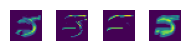

In [85]:
fig, ax = plt.subplots(batch, filters, figsize=(2, 8))
for i in range(batch):
    for j in range(filters):
        if batch > 1:
            ax[i, j].imshow(conv_out_np[i, j, :, :])
            ax[i,j].axis('off')
            if j == 0:
                ax[i, j].set_ylabel(f'Batch {i}', rotation=0)
        else:
            ax[j].imshow(conv_out_np[i, j, :, :])
            ax[j].axis('off')
plt.tight_layout()
plt.show()

In [79]:
# MAX POOLING
pool_layer_np = layers.MaxPool2D(pool_size=2, input_shape=conv_out_np.shape)
pool_out_np = pool_layer_np(conv_out_np)
print(pool_out_np.shape)


(1, 4, 13, 13)


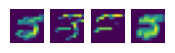

In [86]:
fig, ax = plt.subplots(batch, filters, figsize=(2, 8))
for i in range(batch):
    for j in range(filters):
        if batch > 1:
            ax[i, j].imshow(pool_out_np[i, j, :, :])
            ax[i, j].axis('off')
        else:
            ax[j].imshow(pool_out_np[i, j, :, :])
            ax[j].axis('off')
plt.show()

In [81]:
# FLATTEN
flatten_layer_np = layers.Flatten(input_shape=pool_out_np.shape)
flatten_out_np = flatten_layer_np(pool_out_np)
print(flatten_out_np.shape)


(1, 676)


In [82]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
data = flatten_out_np.reshape(batch, flatten_out_np.shape[-1])
ax.imshow(data)
# for i in range(data.shape[0]):
#     for j in range(data.shape[1]):
#         ax.text(j, i, str(round(data[i, j],5)), ha="center", va="center", color="white", fontsize=12)
ax.set_yticks([])
ax.set_xticks([])

plt.tight_layout()
plt.show()

In [83]:
# DENSE
dense_layer_np = layers.Dense(neurons=10, input_shape=flatten_out_np.shape,activation=activations.Softmax())
dense_out_np = dense_layer_np(flatten_out_np)
print(dense_out_np.shape)

(1, 10)


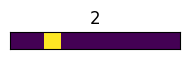

In [88]:
fig, ax = plt.subplots(batch, 1, figsize=(2, 8))
for b in range(batch):
    if batch > 1:
        ax[b].imshow(dense_out_np[b].reshape(1, 10))
        ax[b].set_yticks([])
        ax[b].set_xticks([])
        ax[b].set_title(np.argmax(dense_out_np[b]), rotation=0)
    else:
        ax.imshow(dense_out_np[b].reshape(1, 10))
        ax.set_yticks([])
        ax.set_xticks([])
        ax.set_title(np.argmax(dense_out_np[b]), rotation=0)
plt.tight_layout()
plt.show()


## CAPA POR CAPA (BACKPROPAGATION)

In [89]:
import random
# DENSE
y_true = np.zeros((batch, 10), dtype=int)  # Crea un array lleno de ceros
for i in range(batch):
    y_true[i, random.randint(0, 10-1)] = 1

grad_np = dense_out_np - y_true
dense_grads_np = dense_layer_np.backward(grad_np)

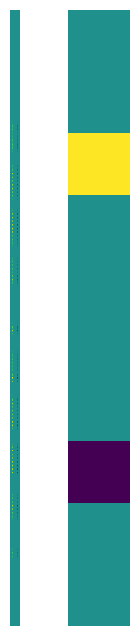

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(2, 8))
ax[0].imshow(dense_layer_np.weights_grads)
ax[0].axis('off')
ax[1].imshow(dense_layer_np.bias_grads.reshape(10, 1))
ax[1].axis('off')
plt.show()

In [91]:
print(dense_grads_np.shape)

fig, ax = plt.subplots(1, 1)
ax.imshow(dense_grads_np)
ax.axis('off')

plt.show()


(1, 676)


In [92]:
# FLATTEN
flatten_grads_np = flatten_layer_np.backward(dense_grads_np)
print(flatten_grads_np.shape)

(1, 4, 13, 13)


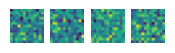

In [95]:
fig, ax = plt.subplots(batch, filters, figsize=(2, 8))
for b in range(batch):
    for f in range(filters):
        if batch > 1:
            ax[b, f].imshow(flatten_grads_np[b][f, :, :])
            ax[b, f].axis('off')
        else:
            ax[f].imshow(flatten_grads_np[b][f, :, :])
            ax[f].axis('off')

plt.show()

In [96]:
# MAX POOLING
pool_grads_np = pool_layer_np.backward(flatten_grads_np)
print(pool_grads_np.shape)

(1, 4, 26, 26)


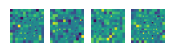

In [99]:
fig, ax = plt.subplots(batch, filters, figsize=(2, 8))

for b in range(batch):
        for f in range(filters):
                if batch > 1:
                        ax[b, f].imshow(pool_grads_np[b][f, :, :])
                        ax[b, f].axis('off')
                else:
                        ax[f].imshow(pool_grads_np[b][f, :, :])
                        ax[f].axis('off')
plt.show()

In [100]:
# CONV
data_grads_np = conv_layer.backward(pool_grads_np)
print(data_grads_np.shape)

(1, 1, 28, 28)


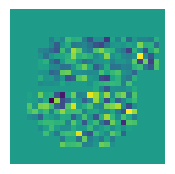

In [102]:
fig, ax = plt.subplots(batch, 1, figsize=(2, 16))

for b in range(batch):
    if batch > 1:
        ax[b].imshow(data_grads_np[b][0])
        ax[b].axis('off')
    else:
        ax.imshow(data_grads_np[b][0])
        ax.axis('off')
plt.show()


In [103]:
# CONV
# print(data_x_tf.numpy().shape)
print(conv_layer.weights_grads.shape)
print('-'*50)
print(conv_layer.bias_grads)


(3, 3, 1, 4)
--------------------------------------------------
[-0.26654621  1.13601031  0.22421431  0.60567335]


(3, 3, 1, 4)


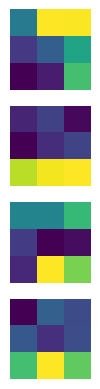

(np.float64(-0.5), np.float64(0.5), np.float64(3.5), np.float64(-0.5))

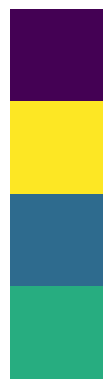

In [104]:
fig, ax = plt.subplots(filters, 1)
w_np = conv_layer.weights_grads
b_np = conv_layer.bias_grads
print(w_np.shape)
for f in range(filters):
    ax[f].imshow(w_np[:, :, :, f])
    ax[f].axis('off')
plt.show()
plt.imshow(b_np.reshape(filters, 1))
plt.axis('off')
